<a href="https://colab.research.google.com/github/himanshu230998/Pianalytics-Grad-CAM-with-VGG-16/blob/main/PianalytiX_Grad_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part -2 Convolutional Neural Networks

In [ ]:
import keras
import numpy as np
import tensorflow as tf
import vis
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import cv2
import keras.backend as K
from skimage import io

Q-1 Download the pretrained model (VGG, ResNet, DenseNet, etc.) from the Keras

In [ ]:
#Build A VGG16
vgg16_model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
vgg16_model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Q-2 Modify the final fully connected layer to accomodate 15 classes. 

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
model.summary()
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=15, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Q-3 Finetune the model to classify the given dataset of 15 dog breeds

In [ ]:
#Data preparation
# Organize data into train, valid, test dirs
train_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/val'
test_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=6, shuffle=False)

Found 1699 images belonging to 15 classes.
Found 483 images belonging to 15 classes.
Found 252 images belonging to 15 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

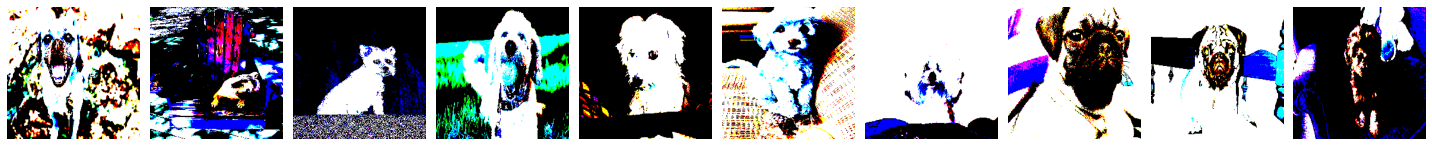

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#Visualize The Data
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
170/170 - 18s - loss: 0.0792 - accuracy: 0.9918 - val_loss: 0.5660 - val_accuracy: 0.8178
Epoch 2/10
170/170 - 18s - loss: 0.0700 - accuracy: 0.9894 - val_loss: 0.5817 - val_accuracy: 0.8178
Epoch 3/10
170/170 - 18s - loss: 0.0625 - accuracy: 0.9929 - val_loss: 0.5812 - val_accuracy: 0.8054
Epoch 4/10
170/170 - 18s - loss: 0.0546 - accuracy: 0.9959 - val_loss: 0.5868 - val_accuracy: 0.8157
Epoch 5/10
170/170 - 18s - loss: 0.0480 - accuracy: 0.9976 - val_loss: 0.5946 - val_accuracy: 0.8157
Epoch 6/10
170/170 - 19s - loss: 0.0430 - accuracy: 0.9971 - val_loss: 0.5918 - val_accuracy: 0.8137
Epoch 7/10
170/170 - 18s - loss: 0.0378 - accuracy: 0.9994 - val_loss: 0.5873 - val_accuracy: 0.8240
Epoch 8/10
170/170 - 18s - loss: 0.0344 - accuracy: 0.9982 - val_loss: 0.6055 - val_accuracy: 0.8137
Epoch 9/10
170/170 - 18s - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.5997 - val_accuracy: 0.8240
Epoch 10/10
170/170 - 18s - loss: 0.0279 - accuracy: 0.9994 - val_loss: 0.6078 - val_accura

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


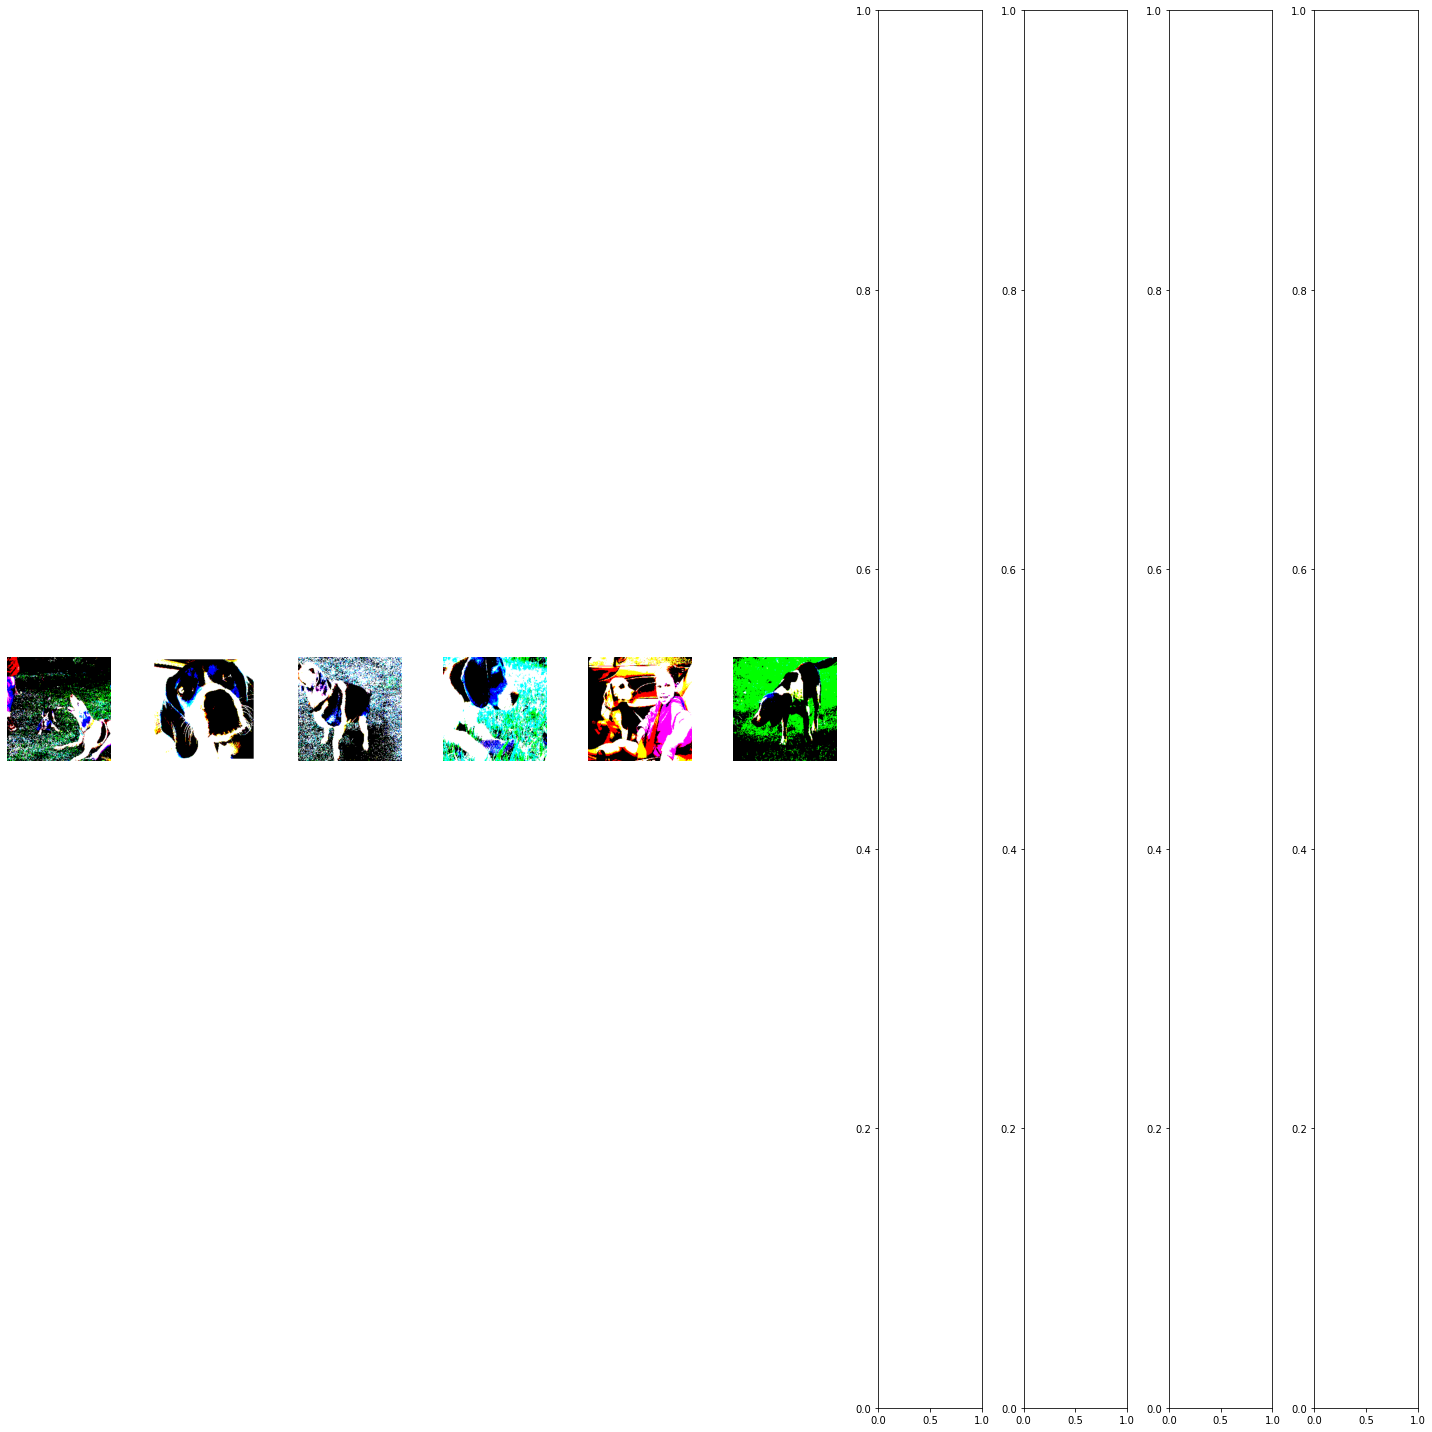

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Confusion matrix, without normalization
[[19  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  2  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  6  0  0  1  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  1  0  1  0  0  1  0]
 [ 0  1  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  1  0  0  7  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  2  0  0 13  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  4  7  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0 17  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1 12  0]

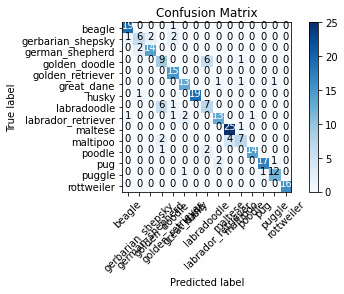

In [ ]:
#Preparing The Test Data
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

#Predict With A Fine-Tuned VGG16 model On The Test Data
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)

#Plotting Predictions With A Confusion Matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
test_batches.class_indices
cm_plot_labels = ['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Implement the Grad-CAM methodolgy by Selvaraju et al.[5] to visualize which regions of the test image is seminal to the classifier's output.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

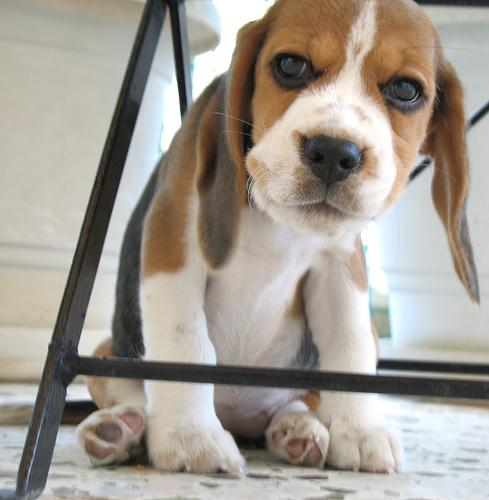

In [ ]:

img_size = (224, 224)
#preprocess_input = keras.applications.xception.preprocess_input
#decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block5_conv3"
classifier_layer_names = [
            "block5_pool",
            "flatten",
            "fc1",
            "fc2",
            "dense",
]

# The local path to our target image
img_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/test/beagle/beagle.00043.jpg'
display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap



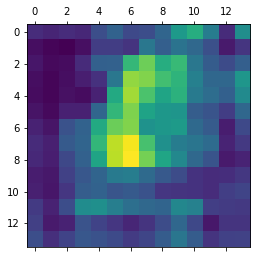

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the top predicted class is
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Here, after i changed various photos of dog manually, i found heat map(not superimposed image as contrast is less) to be more yellow for face

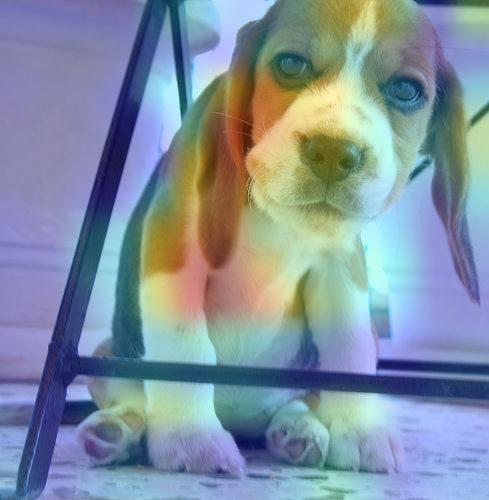

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "dog.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))
